# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

# Loading Dataset

In [2]:
# Load the dataset from the specified path
data_path = 'study_performance.csv'
data = pd.read_csv("study_performance.csv")
print(data.head())
print(data.info())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

# Plot Histograms of Score Distributions

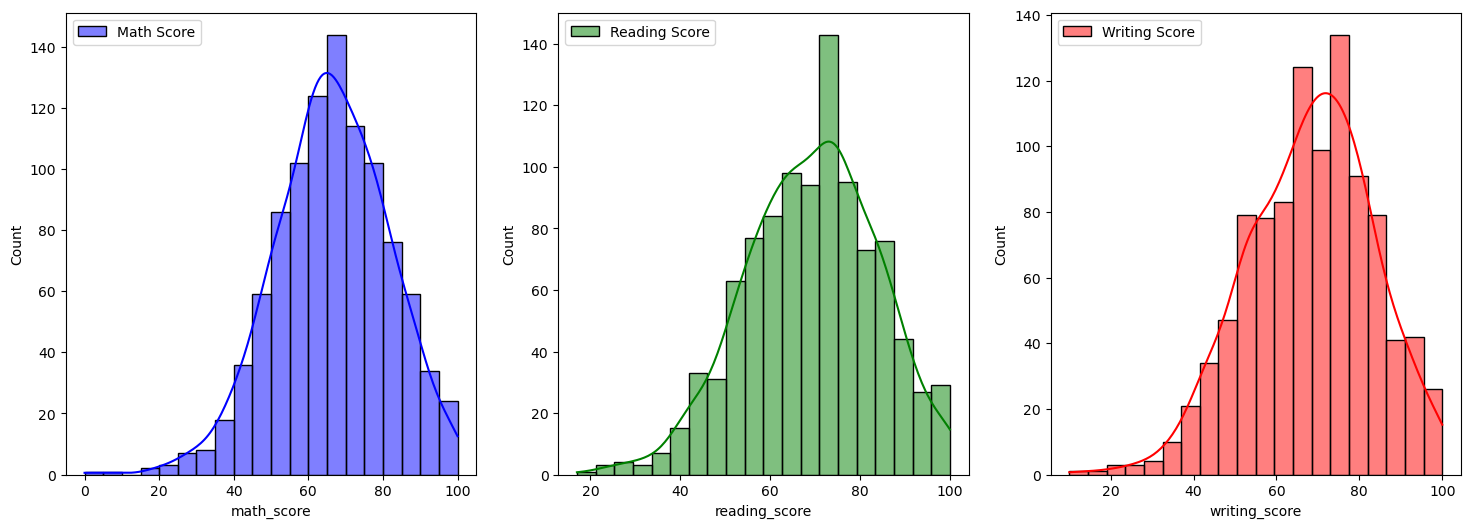

In [3]:
 def plot_histograms(data):
  """Plot histograms for math, reading, and writing score distributions."""
 fig, axes = plt.subplots(1, 3, figsize=(18, 6))
 sns.histplot(data['math_score'], bins=20, kde=True, ax=axes[0], color='blue', label='Math Score')
 axes[0].legend(loc='upper left')
 sns.histplot(data['reading_score'], bins=20, kde=True, ax=axes[1], color='green', label='Reading Score')
 axes[1].legend(loc='upper left')
 sns.histplot(data['writing_score'], bins=20, kde=True, ax=axes[2], color='red', label='Writing Score')
 axes[2].legend(loc='upper left')
 plt.show()

# Scatter Plot of Math vs. Reading Scores

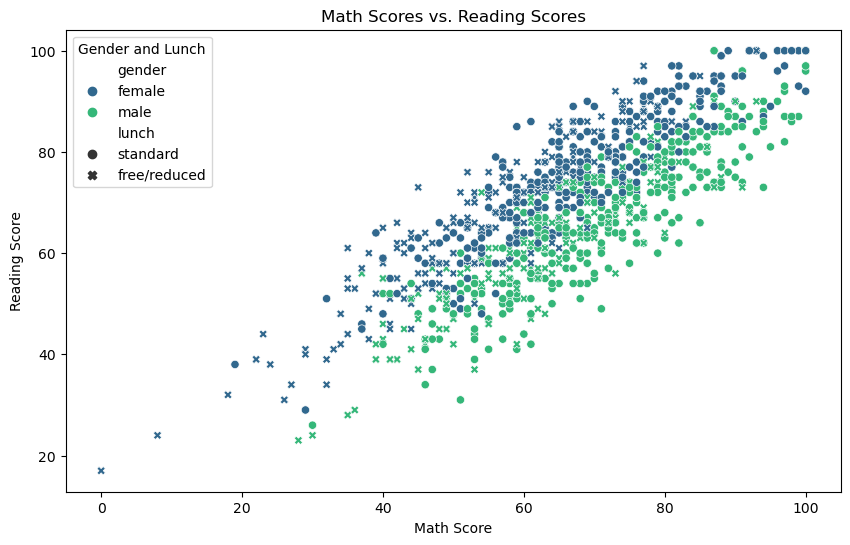

In [4]:
 def scatter_math_vs_reading(data):
  """Create a scatter plot to compare math scores against reading scores."""
 plt.figure(figsize=(10, 6))
 sns.scatterplot(x=data['math_score'], y=data['reading_score'], hue=data['gender'], style=data['lunch'], palette='viridis')
 plt.title('Math Scores vs. Reading Scores')
 plt.xlabel('Math Score')
 plt.ylabel('Reading Score')
 plt.legend(title='Gender and Lunch')
 plt.show()

# Box Plot of Writing Scores by Race/Ethnicity and Gender

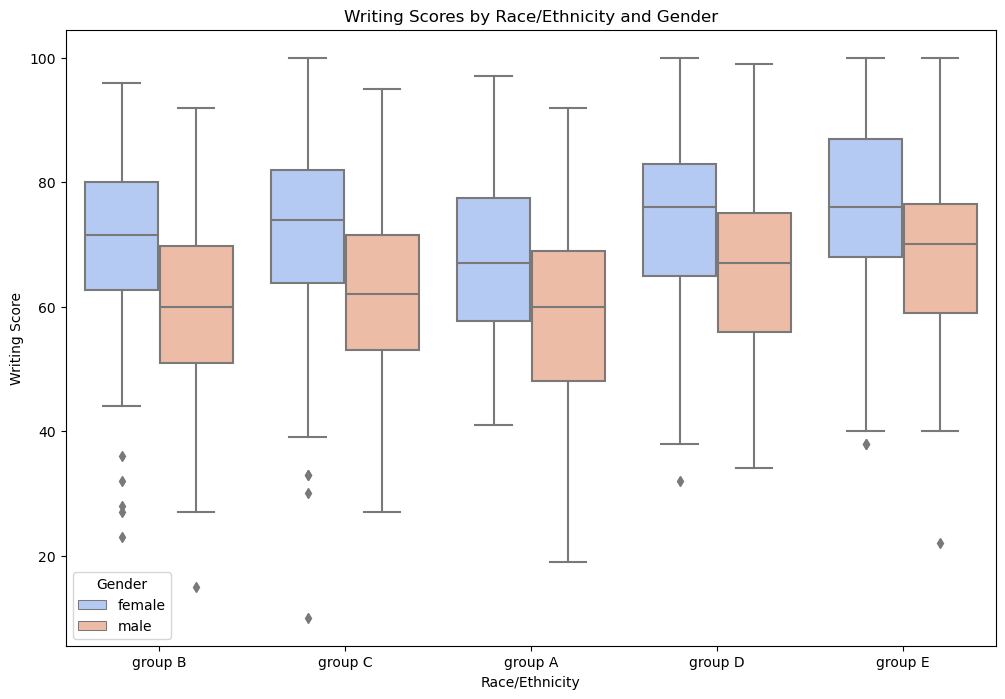

In [5]:
 def boxplot_writing_scores(data):
  """Display a box plot for writing scores segmented by race/ethnicity and gender."""
 plt.figure(figsize=(12, 8))
 sns.boxplot(x=data['race_ethnicity'], y=data['writing_score'], hue=data['gender'], palette='coolwarm')
 plt.title('Writing Scores by Race/Ethnicity and Gender')
 plt.xlabel('Race/Ethnicity')
 plt.ylabel('Writing Score')
 plt.legend(title='Gender')
 plt.show()

# Elbow plot for k-means clustering

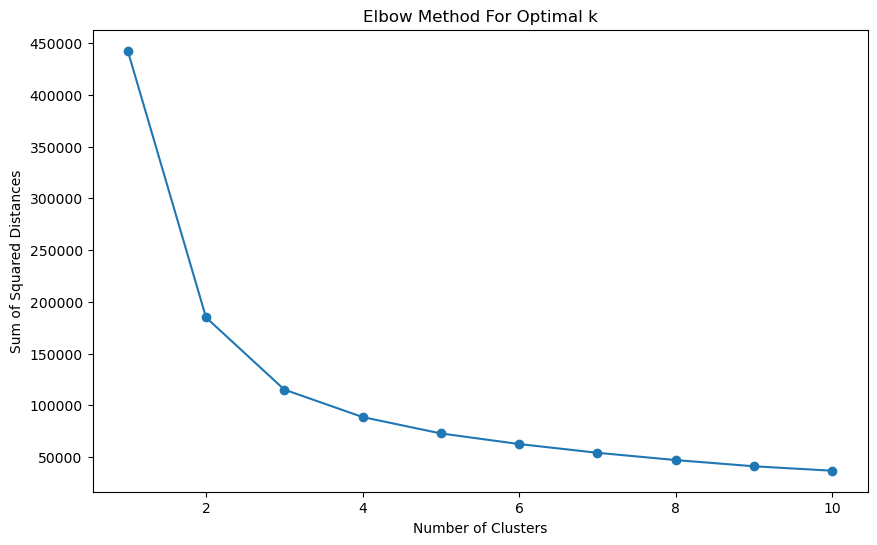

In [6]:
def elbow_plot_kmeans(data):
  """Generate an elbow plot to determine the optimal number of clusters for K-means."""
sse = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
     kmeans.fit(data[['math_score', 'reading_score']])
     sse.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

# Applying k-means clustering

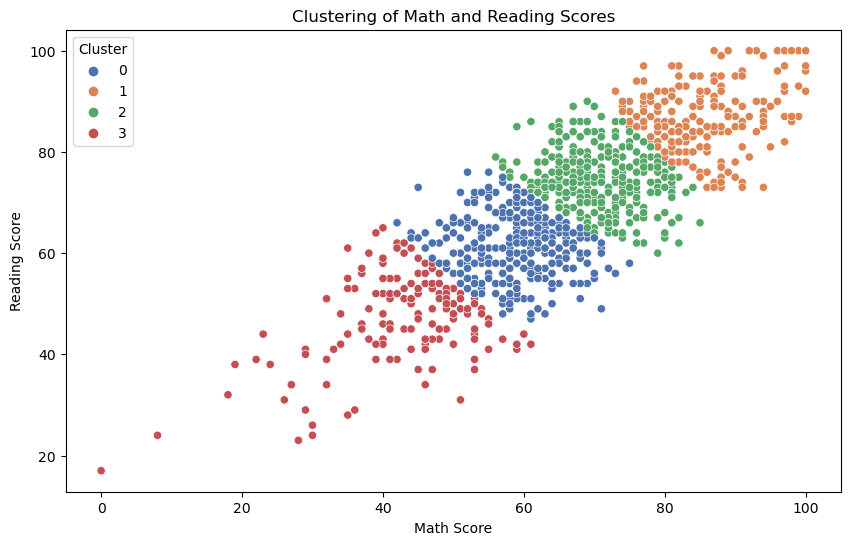

In [7]:
def apply_kmeans(data):
  """Apply K-means clustering to the data and visualize the result."""
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(data[['math_score', 'reading_score']])
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['math_score'], y=data['reading_score'], hue=data['cluster'], palette='deep')
plt.title('Clustering of Math and Reading Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.legend(title='Cluster')
plt.show()

# Linear regression for predicting reading scores from math scores

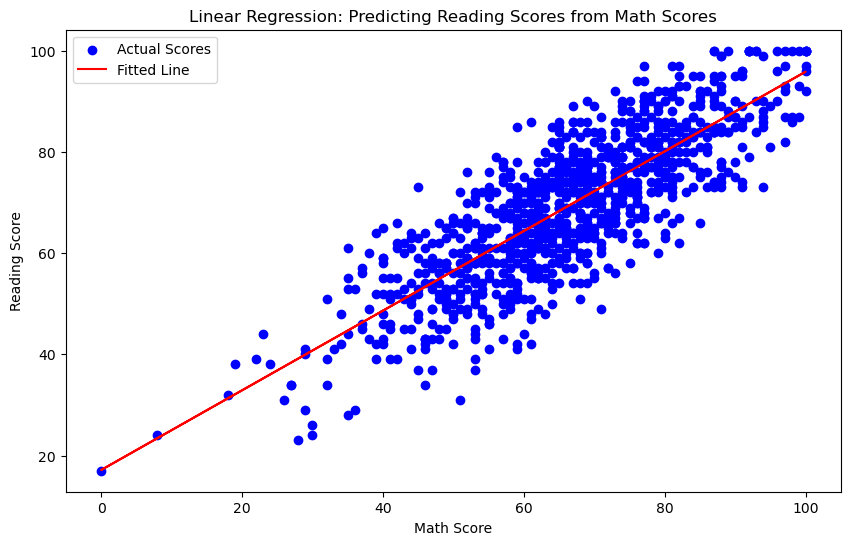

In [8]:
def linear_regression(data):
  """Perform linear regression to predict reading scores from math scores."""
X = data['math_score'].values.reshape(-1, 1)
y = data['reading_score']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Scores')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.title('Linear Regression: Predicting Reading Scores from Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.legend()
plt.show()